In [1]:
import random
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import os
import math
import re
from collections import Counter
import scipy.stats
import seaborn as sns

In [10]:
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

In [2]:
path11 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 NobelpapersCD.zip'
path12 = r'E:\netData\MAGzip\MAG Nobel\2 Nobelpapers\712 Nobelpapers.zip'
path21 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 NobelpapercontrolsCD.zip'
path22 = r'E:\netData\MAGzip\MAG Nobel\2 NobelpaperControls\20954 Nobelpapercontrols.zip'

In [3]:
fNobel1 = pd.read_csv(path11)
fControl1 = pd.read_csv(path21)
fNobel2 = pd.read_csv(path12)
fControl2 = pd.read_csv(path22)

In [4]:
fNobel = pd.concat([fNobel1 , fNobel2] , axis = 1)
fControl = pd.concat([fControl1 , fControl2] , axis = 1)

fNobel = fNobel.loc[:, ~fNobel.columns.duplicated()]
fControl = fControl.loc[:, ~fControl.columns.duplicated()]

# fig2

In [5]:
d1 = fNobel[fNobel['Field'] == 'Physics']['ni'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['ni'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['ni'].values

d4 = fControl[fControl['Field'] == 'Physics']['ni'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['ni'].values
d6 = fControl[fControl['Field'] == 'Medicine']['ni'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

In [7]:
print(scipy.stats.mannwhitneyu(d1 , d4, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d6, alternative='two-sided'))

MannwhitneyuResult(statistic=1211803.0, pvalue=5.533732855241208e-119)
MannwhitneyuResult(statistic=1839564.5, pvalue=1.8387778241531943e-105)
MannwhitneyuResult(statistic=1615847.5, pvalue=1.0165913969121879e-144)


In [8]:
d

[1243.26267281106,
 1591.3136363636363,
 1164.9927272727273,
 38.60554885404101,
 37.25269474386043,
 46.315182054616386]

In [9]:
d1 = np.array(d[:3])
d2 = np.array(d[3:])
(d1-d2)/d1

array([0.9689482 , 0.97658997, 0.96024423])

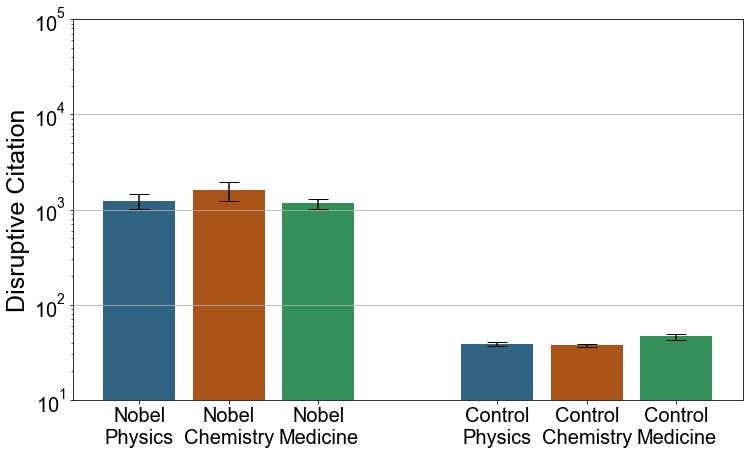

In [11]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))


plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
ax.set_yscale("log")
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks([10e0,10e1,10e2,10e3,10e4],size = 20)
plt.ylabel(r'Disruptive Citation',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 3 B2\1.pdf",bbox_inches = 'tight')

In [12]:
d1 = fNobel[fNobel['Field'] == 'Physics']['CD'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['CD'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['CD'].values

d4 = fControl[fControl['Field'] == 'Physics']['CD'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['CD'].values
d6 = fControl[fControl['Field'] == 'Medicine']['CD'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

In [14]:
print(scipy.stats.mannwhitneyu(d1 , d4, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d2 , d5, alternative='two-sided'))
print(scipy.stats.mannwhitneyu(d3 , d6, alternative='two-sided'))

MannwhitneyuResult(statistic=680955.0, pvalue=0.017268229461414344)
MannwhitneyuResult(statistic=1100909.5, pvalue=0.002861304178119255)
MannwhitneyuResult(statistic=992724.0, pvalue=6.230104975547682e-07)


In [37]:
d

[0.7409576563679466,
 0.5294723558354187,
 0.41362020508722386,
 0.6641885085598401,
 0.4754392176289378,
 0.35935359659448485]

In [12]:
d1 = np.array(d[:3])
d2 = np.array(d[3:])
(d1-d2)/d1

array([0.10360801, 0.10205091, 0.13119912])

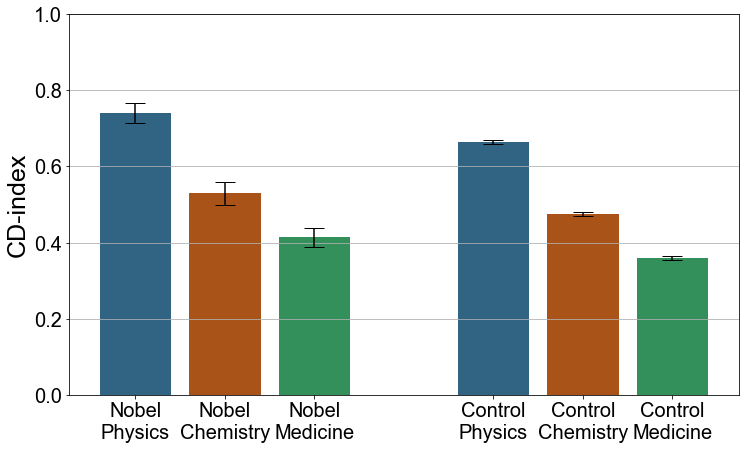

In [13]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))
plt.rcParams["font.family"] = "Arial"
plt.rcParams["text.usetex"] = False

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.ylim((0,1))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel(r'CD-index',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 3\2.pdf",bbox_inches = 'tight')

# Fig A2

In [14]:
d1 = fNobel[fNobel['Field'] == 'Physics']['nj'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['nj'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['nj'].values

d4 = fControl[fControl['Field'] == 'Physics']['nj'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['nj'].values
d6 = fControl[fControl['Field'] == 'Medicine']['nj'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

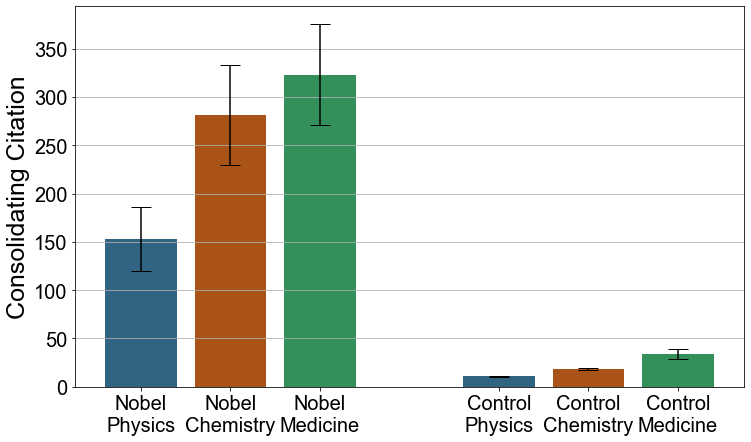

In [15]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
#plt.ylim((0,80))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel(r'Consolidating Citation',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 3\3.pdf",bbox_inches = 'tight')

In [27]:
d1 = fNobel[fNobel['Field'] == 'Physics']['DIsharp'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['DIsharp'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['DIsharp'].values

d4 = fControl[fControl['Field'] == 'Physics']['DIsharp'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['DIsharp'].values
d6 = fControl[fControl['Field'] == 'Medicine']['DIsharp'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

In [28]:
d

[0.7660289196752963,
 0.5591161091514112,
 0.45125229299211406,
 0.6561440037465676,
 0.481423148320871,
 0.37566461800046846]

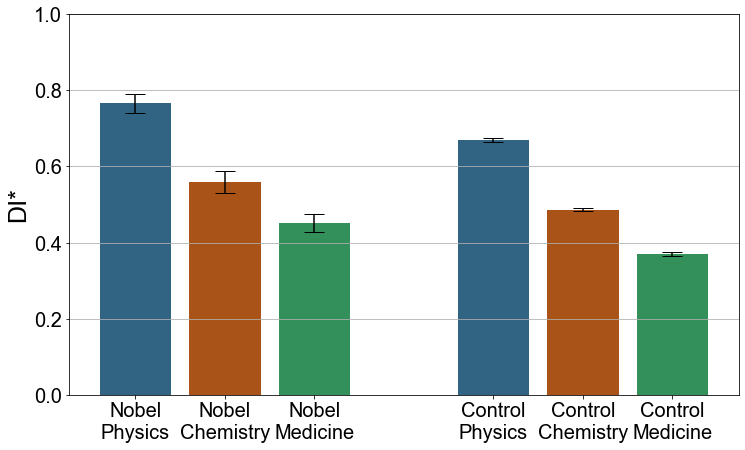

In [41]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.ylim((0,1))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel('DI*',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 3\4.pdf",bbox_inches = 'tight')

In [29]:
d1 = fNobel[fNobel['Field'] == 'Physics']['DIeasy'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['DIeasy'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['DIeasy'].values

d4 = fControl[fControl['Field'] == 'Physics']['DIeasy'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['DIeasy'].values
d6 = fControl[fControl['Field'] == 'Medicine']['DIeasy'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

In [30]:
d

[0.9090438469746532,
 0.8280987678431372,
 0.7774617514508007,
 0.7785997957698972,
 0.6972425003799182,
 0.6130195453924114]

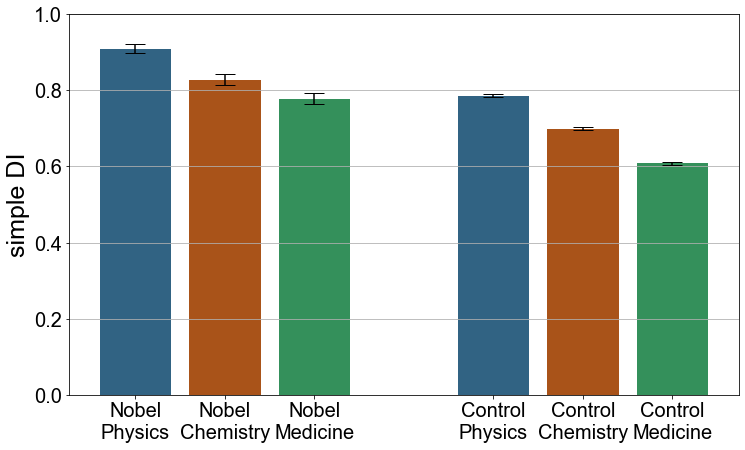

In [43]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.ylim((0,1))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel('simple DI',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"F:\A J YANG PAPER\MAG analysis\Nobel analysis\QSS Disruptive citation for Nobel Prize papers\fig\fig 3\5.pdf",bbox_inches = 'tight')

In [24]:
d1 = fNobel[fNobel['Field'] == 'Physics']['C-CD P'].values
d2 = fNobel[fNobel['Field'] == 'Chemistry']['C-CD P'].values
d3 = fNobel[fNobel['Field'] == 'Medicine']['C-CD P'].dropna().values

d4 = fControl[fControl['Field'] == 'Physics']['C-CD P'].values
d5 = fControl[fControl['Field'] == 'Chemistry']['C-CD P'].values
d6 = fControl[fControl['Field'] == 'Medicine']['C-CD P'].values

d = [np.mean(d1),np.mean(d2),np.mean(d3),np.mean(d4),np.mean(d5),np.mean(d6)]
std = [np.std(d1)*len(d1)**-0.5,np.std(d2)*len(d2)**-0.5,np.std(d3)*len(d3)**-0.5,np.std(d4)*len(d4)**-0.5,np.std(d5)*len(d5)**-0.5,np.std(d6)*len(d6)**-0.5]

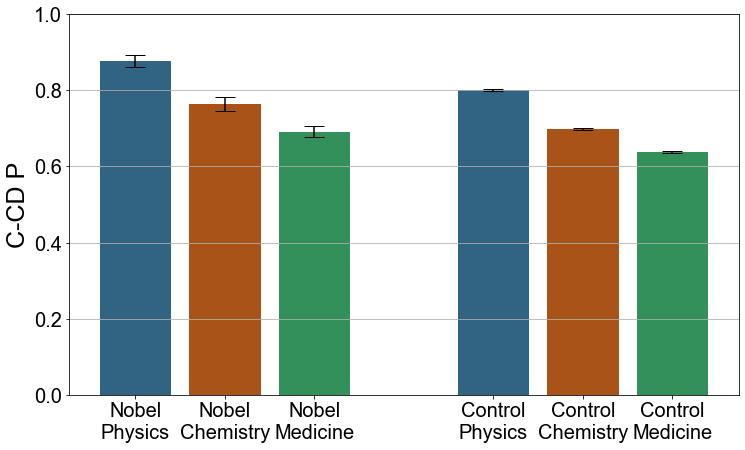

In [25]:
y_pos = [1,2,3,5,6,7]
f, ax = plt.subplots(figsize=(12, 7))

plt.bar(y_pos, d, yerr=std,align='center', color= ['#1A5276','#A04000','#1E8449','#1A5276','#A04000','#1E8449'],alpha=0.9,capsize=10)
ax.yaxis.grid(True)
plt.ylim((0,1))
plt.xticks(y_pos,['Nobel\nPhysics','Nobel\nChemistry' , 'Nobel\nMedicine' ,'Control\nPhysics','Control\nChemistry' , 'Control\nMedicine'],fontsize = 20)
plt.yticks(size = 20)
plt.ylabel('C-CD P',fontsize = 25)
#plt.title("Physics",size = 35)
plt.savefig(r"G:\A J YANG PAPER\MAG analysis\papers Nobel\QSS Disruptive citation for Nobel Prize papers\fig\fig 3 B2\6.pdf",bbox_inches = 'tight')

In [26]:
d

[0.8762857245279856,
 0.7637246687908428,
 0.6917843300345182,
 0.8013176663771165,
 0.6981253551487665,
 0.6381745389683959]